In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Embedding, GRU, Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
sc = MinMaxScaler(feature_range = (0, 1))

In [45]:
data = pd.read_csv('NSE-TATAGLOBAL.csv')

In [46]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [47]:
data['Date'] = pd.to_datetime(data['Date'])

In [48]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [49]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [50]:
data.Date.nunique()

2035

In [87]:
data=data.sort_values(by='Date')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [88]:
data = data.set_index('Date')

In [89]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [90]:
data= (data - data.min()) / (data.max() - data.min())

In [91]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,0.166261,0.163448,0.169874,0.163707,0.165850,0.021236,0.013757
2010-07-22,0.158962,0.159382,0.166563,0.162278,0.163194,0.008703,0.005710
2010-07-23,0.165045,0.159179,0.166563,0.160645,0.162173,0.008291,0.005443
2010-07-26,0.158151,0.155316,0.153528,0.147377,0.149714,0.021228,0.013334
2010-07-27,0.148013,0.149217,0.132423,0.154317,0.154003,0.018747,0.011808


In [92]:
x = data
y = data['Close']
x = x.drop(['Close'],axis = 1)

In [93]:
y


Date
2010-07-21    0.165850
2010-07-22    0.163194
2010-07-23    0.162173
2010-07-26    0.149714
2010-07-27    0.154003
                ...   
2018-09-24    0.622345
2018-09-25    0.633783
2018-09-26    0.626225
2018-09-27    0.622141
2018-09-28    0.624183
Name: Close, Length: 2035, dtype: float64

In [94]:
X_val,X_train,y_val,y_train = train_test_split(x,y,test_size = 0.8,random_state = 123,shuffle = False)

In [95]:
X_train.shape

(1628, 6)

In [96]:
y_train.shape

(1628,)

In [97]:
win = 5
batch_siz = 32
num_features = 6
train_generator = TimeseriesGenerator(X_train,y_train,length = win,sampling_rate = 1,batch_size = batch_siz)
val_generator = TimeseriesGenerator(X_val,y_val,length = win,sampling_rate = 1,batch_size = batch_siz)

In [98]:
def lstm():
    model = keras.Sequential()
    model.add(layers.LSTM(units=256, return_sequences=True, input_shape=[win, num_features]))
    model.add(layers.Dropout(0.2))
    model.add(layers.LSTM(units=128,return_sequences=True))
    model.add(keras.layers.BatchNormalization())
    model.add(layers.LSTM(units=128, return_sequences=True))
    model.add(keras.layers.BatchNormalization())
    model.add(layers.Dropout(0.2))
    model.add(layers.LSTM(units=64, return_sequences=True))
    model.add(keras.layers.BatchNormalization())
    model.add(layers.LSTM(units=16))
    model.add(tf.keras.layers.Dense(1))
    #model.add(keras.layers.TimeDistributed(keras.layers.Dense(num_features)))
    
    
    model.compile(loss="mae", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mae'])
    return model


In [99]:
lst = lstm()
lst.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 5, 256)            269312    
                                                                 
 dropout_4 (Dropout)         (None, 5, 256)            0         
                                                                 
 lstm_11 (LSTM)              (None, 5, 128)            197120    
                                                                 
 batch_normalization_6 (Batc  (None, 5, 128)           512       
 hNormalization)                                                 
                                                                 
 lstm_12 (LSTM)              (None, 5, 128)            131584    
                                                                 
 batch_normalization_7 (Batc  (None, 5, 128)           512       
 hNormalization)                                      

In [100]:
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_mae',
                                               min_delta=0.0001,
                                               patience=100, 
                                               restore_best_weights=True)



EPOCHS = 500

#lst_history = lst.fit(
#    X_train,y_train,
#    validation_data=(X_val,y_val), 
#    epochs=EPOCHS, 
#    callbacks=[early_stopping],
 #   batch_size = 512,
#    shuffle=True)
lst_history = lst.fit(
    train_generator,
    validation_data=val_generator, 
    epochs=EPOCHS, 
    callbacks=[early_stopping],
    batch_size = batch_siz,
    shuffle=True)

Epoch 1/500
51/51 [==============================] - 43s 238ms/step - loss: 0.1608 - mae: 0.1608 - val_loss: 0.0606 - val_mae: 0.0606
Epoch 2/500
51/51 [==============================] - 5s 104ms/step - loss: 0.0904 - mae: 0.0904 - val_loss: 0.1023 - val_mae: 0.1023
Epoch 3/500
51/51 [==============================] - 5s 103ms/step - loss: 0.0605 - mae: 0.0605 - val_loss: 0.1608 - val_mae: 0.1608
Epoch 4/500
51/51 [==============================] - 5s 103ms/step - loss: 0.0599 - mae: 0.0599 - val_loss: 0.1772 - val_mae: 0.1772
Epoch 5/500
51/51 [==============================] - 5s 98ms/step - loss: 0.0513 - mae: 0.0513 - val_loss: 0.1836 - val_mae: 0.1836
Epoch 6/500
51/51 [==============================] - 5s 104ms/step - loss: 0.0539 - mae: 0.0539 - val_loss: 0.0494 - val_mae: 0.0494
Epoch 7/500
51/51 [==============================] - 5s 96ms/step - loss: 0.0362 - mae: 0.0362 - val_loss: 0.0779 - val_mae: 0.0779
Epoch 8/500
51/51 [==============================] - 5s 104ms/step - l

51/51 [==============================] - 5s 103ms/step - loss: 0.0295 - mae: 0.0295 - val_loss: 0.1123 - val_mae: 0.1123
Epoch 63/500
51/51 [==============================] - 5s 102ms/step - loss: 0.0238 - mae: 0.0238 - val_loss: 0.1080 - val_mae: 0.1080
Epoch 64/500
51/51 [==============================] - 5s 103ms/step - loss: 0.0195 - mae: 0.0195 - val_loss: 0.0863 - val_mae: 0.0863
Epoch 65/500
51/51 [==============================] - 5s 102ms/step - loss: 0.0247 - mae: 0.0247 - val_loss: 0.3113 - val_mae: 0.3113
Epoch 66/500
51/51 [==============================] - 5s 102ms/step - loss: 0.0258 - mae: 0.0258 - val_loss: 0.5384 - val_mae: 0.5384
Epoch 67/500
51/51 [==============================] - 5s 104ms/step - loss: 0.0242 - mae: 0.0242 - val_loss: 0.1380 - val_mae: 0.1380
Epoch 68/500
51/51 [==============================] - 5s 104ms/step - loss: 0.0214 - mae: 0.0214 - val_loss: 0.0926 - val_mae: 0.0926
Epoch 69/500
51/51 [==============================] - 5s 104ms/step - loss:

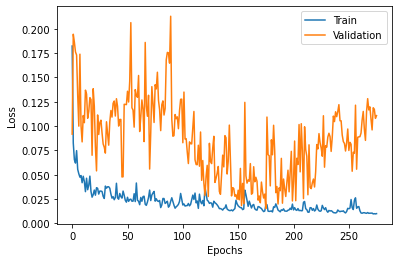

In [70]:
import matplotlib.pyplot as mpl
mpl.plot(lst_history.history['loss'])
mpl.plot(lst_history.history['val_mae'])
mpl.xlabel('Epochs')
mpl.ylabel('Loss')
mpl.legend(['Train', 'Validation'])
mpl.show()

In [71]:
td = pd.read_csv("tatatest.csv")

In [72]:
td.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


In [73]:
td['Date'] = pd.to_datetime(td['Date'])

In [74]:
td.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [76]:
td=td.sort_values(by='Date')
td.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
15,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749,3486.05
14,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
13,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
12,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
11,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146,10062.83


In [77]:
td = tdset_index('Date')

In [78]:
td.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749,3486.05
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146,10062.83


In [79]:
xt = td
yt = td['Close']
xt = xt.drop(['Close'],axis = 1)

In [80]:
sc = MinMaxScaler(feature_range = (0, 1))
xtt = sc.fit_transform(xt)


In [81]:
ytt = (yt - yt.min()) / (yt.max() - yt.min())

In [83]:
win = 2
batch_siz = 16
num_features = 6
test_generator = TimeseriesGenerator(xtt,ytt,length = win,sampling_rate = 1,batch_size = batch_siz)

In [84]:
predicted_stock_pricelst = lst.predict(test_generator)

1/1 [==============================] - 5s 5s/step


In [85]:
def rev_min_max_func(scaled_val):
    max_val = max(yt)
    min_val = min(yt)
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val
rev_min_max_funclst = rev_min_max_func(predicted_stock_pricelst)

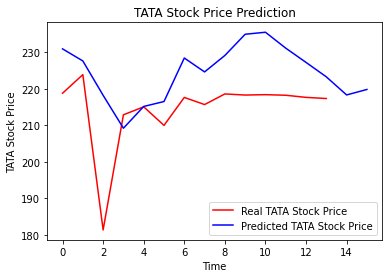

In [86]:
plt.plot(rev_min_max_funclst, color = 'red', label = 'Real TATA Stock Price')
plt.plot(yt.values, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()